<a href="https://colab.research.google.com/github/Pria91/Machine-Learning-Projects-/blob/main/Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***PREDICTIVE ANALYSIS EXCERCISE***


***Let's import all libraries required in this project*** 


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

***Let's read the data from input file***

In [5]:
data = pd.read_csv("ScoresData.csv")

In [6]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [13]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


***Let's explore the data***

In [21]:
data.dtypes 

Hours     float64
Scores      int64
dtype: object

In [22]:
#Total number of rows and columns 
data.shape

(25, 2)

***Let's look at the statistical details***

In [23]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


***Let's check for Null values, if any***

In [24]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

***Let's explore and analyse this data***

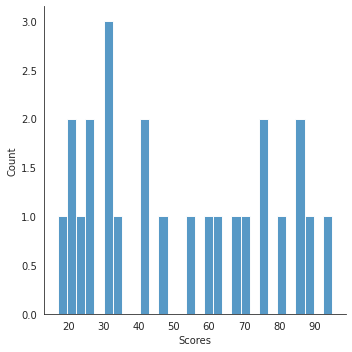

In [14]:
sns.set_style('white')
sns.displot(data['Scores'], kde = False, bins = 30)

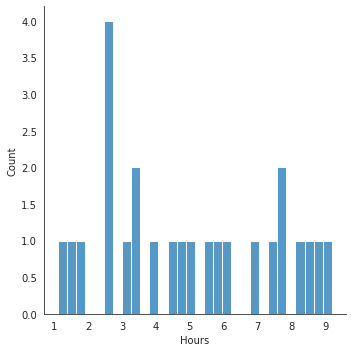

In [15]:
sns.set_style('white')
sns.displot(data['Hours'], kde = False, bins = 30)

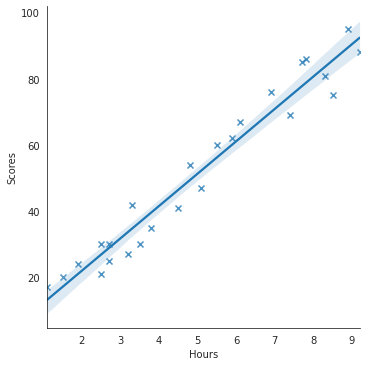

In [22]:
sns.lmplot(x='Hours', y='Scores', data = data,  markers=["x"], palette="Set2")

***Now, Let's prepare the Model to make the prediction that we are after!***

In [42]:
#Assigning the dependent and independent variable 

x1 = data.iloc[:,:-1].values
y1 = data.iloc[:,1].values

X = x1.reshape(-1,1)
y = y1.reshape(-1,1)

In [44]:
#Dividing the test and train values in 20:80 size respectively 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [45]:
#Creating and Training the model 
from sklearn.linear_model import LinearRegression


#Creating the model 
lmodel = LinearRegression()


#Training the model 
lmodel.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

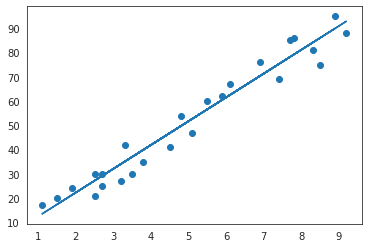

In [52]:
#Creating a line from fitting model

line = lmodel.coef_*X+lmodel.intercept_

#Plots
plt.scatter(X,y)               #same as x vs y plot from data file 
plt.plot(X,line)
plt.show()

***Let's check the prediction of known values***

In [62]:
#Predicting Test Data
predictions = lmodel.predict(X_test)


#scores for the given study hours 
predictions 

array([[17.37142335],
       [52.70292295],
       [35.03717315],
       [34.05574261],
       [46.81433968]])

Text(0, 0.5, 'PREDICTED Y')

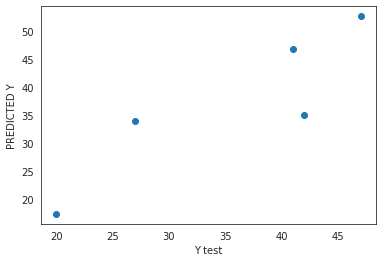

In [63]:
#Actual test value vs the predicted value 

plt.scatter(y_test, predictions)
plt.xlabel('Y test')
plt.ylabel('PREDICTED Y')

***Evaluation of Model***

In [64]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predictions))

print('Mean Square Error:', metrics.mean_squared_error(y_test,predictions))

print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean Absolute Error: 5.632881746692994
Mean Square Error: 34.30075055068739
Root Mean Square Error: 5.856684262506166


In [65]:
#variance of model 

metrics.explained_variance_score(y_test,predictions)

0.6995941245629577

***Now, Let's make our final prediction***

In [67]:
#If the student studies 9.25 hours/day, then what will be the score ? 

hours = np.array(9.25)

hours = hours.reshape(-1,1)

answer = lmodel.predict(hours)

print("If the student studies 9.25 hours/day, then the score will be:", answer)

If the student studies 9.25 hours/day, then the score will be: [[93.43229054]]


***Why did we do this ? Was there any easy Math to do it?***

In [36]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [37]:
Scores = data['Scores']
Scores

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [38]:
Hours = data['Hours']
Hours

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64

In [39]:
final = (Scores/Hours)*9.25
final 

0      77.700000
1      85.245098
2      78.046875
3      81.617647
4      79.285714
5     123.333333
6      88.478261
7     100.909091
8      90.271084
9      85.648148
10    102.110390
11     97.203390
12     84.277778
13    117.727273
14    142.954545
15     98.735955
16    111.000000
17    116.842105
18    101.598361
19     86.250000
20    102.777778
21    104.062500
22     85.197368
23    101.884058
24    101.987179
dtype: float64

In [40]:
sum = final.sum()
sum

2445.1439320138347

In [41]:
average = sum/25
average

97.8057572805534

***The answer is No! Easy Math makes a prediction, Not as good as Regression Analysis***